### Training session for better structure the concepts

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline


/home/popescuaaa/anaconda3/envs/machine_learning/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### Plot weather data - kaggle -

In [2]:
def plotData(X, y): # generic  
    fig = pyplot.figure()
    pyplot.plot(X, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Rainfall')
    pyplot.xlabel('Humidity')

X: (21,) => [ 120.  121.  122.  130.  132.  134.  136.  140.  142.  144.  150.  152.
  154.  160.  162.  164.  131.  123.  133.  141.  144.]
y: (21,) => [ 10.  12.  14.  16.  18.  20.  22.  24.  26.  28.  30.  32.  34.  36.  38.
  40.  42.  44.  46.  48.  50.]
[-0.4491342  -0.42640693 -0.40367965 -0.22186147 -0.17640693 -0.13095238
 -0.08549784  0.00541126  0.0508658   0.09632035  0.23268398  0.27813853
  0.32359307  0.45995671  0.50541126  0.5508658  -0.1991342  -0.38095238
 -0.15367965  0.02813853  0.09632035]
[-0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05
  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5 ]


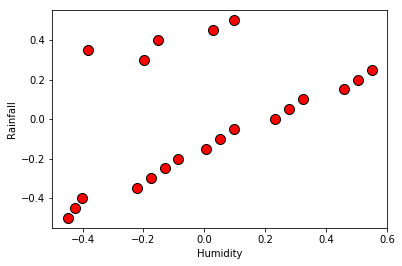

In [3]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', 'weather_data.csv'), delimiter=',')
X, y = data[:, 0], data[:, 1]
print('X: {} => {}'.format(X.shape, X))
print('y: {} => {}'.format(y.shape, y))
m = y.size  # number of training examples
# Process data 

# finding the mean vlues
mu_x = np.sum(X) / X.size
mu_y = np.sum(y) / y.size

# finding the standard deviation
s_x = np.amax(X) - np.amin(X)
s_y = np.amax(y) - np.amin(y)

# normalizing all elements
norm = lambda x, mu, s: (x - mu) / s
_X = np.array([norm(x, mu_x, s_x) for x in X])
_y = np.array([norm(x, mu_y, s_y) for x in y])

print(_X)
print(_y)

plotData(_X, _y)

### Compute cost function

In [4]:
# stack ones 
_X = np.stack([np.ones(y.size), _X], axis=1)

In [5]:
def computeCost(X, y, theta):
    training_size = y.size
    # calculate the hypothesis
    h = X @ theta
    print(h)
    return (1/2*m) * np.sum((h - y)**2)

In [6]:
# test the function
print(computeCost(_X, _y, np.array([0.0, 0.1])))

[-0.04491342 -0.04264069 -0.04036797 -0.02218615 -0.01764069 -0.01309524
 -0.00854978  0.00054113  0.00508658  0.00963203  0.0232684   0.02781385
  0.03235931  0.04599567  0.05054113  0.05508658 -0.01991342 -0.03809524
 -0.01536797  0.00281385  0.00963203]
18.5040702479


### Gradient descent

In [7]:
def gradientDescent(X, y, theta, alpha, n_iter):
    
    # I choosed to work with an error not with 
    # a maximum number of iterations
    
    J_history = []
    
    _theta = np.zeros(2)
    theta = theta - (alpha/m) * X.T @ (X @ theta - y)
    
    for i in range(n_iter):
        theta = theta - (alpha/m) * X.T @ (X @ theta - y)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [8]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
n_iter = 10000
alpha = 0.01

theta, J_history = gradientDescent(_X ,_y, theta, alpha, n_iter)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))


[ -3.88200088e-04  -3.68556228e-04  -3.48912368e-04  -1.91761489e-04
  -1.52473770e-04  -1.13186050e-04  -7.38983300e-05   4.67710950e-06
   4.39648293e-05   8.32525490e-05   2.01115708e-04   2.40403428e-04
   2.79691148e-04   3.97554307e-04   4.36842027e-04   4.76129747e-04
  -1.72117629e-04  -3.29268509e-04  -1.32829910e-04   2.43209694e-05
   8.32525490e-05]
[ -5.82038368e-04  -5.52585824e-04  -5.23133280e-04  -2.87512929e-04
  -2.28607841e-04  -1.69702753e-04  -1.10797665e-04   7.01251046e-06
   6.59175983e-05   1.24822686e-04   3.01537950e-04   3.60443037e-04
   4.19348125e-04   5.96063389e-04   6.54968477e-04   7.13873564e-04
  -2.58060385e-04  -4.93680736e-04  -1.99155297e-04   3.64650544e-05
   1.24822686e-04]
[ -7.75702347e-04  -7.36449939e-04  -6.97197531e-04  -3.83178268e-04
  -3.04673452e-04  -2.26168636e-04  -1.47663820e-04   9.34581141e-06
   8.78506273e-05   1.66355443e-04   4.01869891e-04   4.80374706e-04
   5.58879522e-04   7.94393970e-04   8.72898786e-04   9.51403602e

[-0.05107994 -0.04849518 -0.04591041 -0.02523226 -0.02006272 -0.01489319
 -0.00972365  0.00061542  0.00578496  0.01095449  0.0264631   0.03163264
  0.03680218  0.05231079  0.05748032  0.06264986 -0.02264749 -0.04332564
 -0.01747796  0.00320019  0.01095449]
[-0.0512282  -0.04863593 -0.04604366 -0.0253055  -0.02012096 -0.01493641
 -0.00975187  0.00061721  0.00580175  0.01098629  0.02653991  0.03172445
  0.03690899  0.05246261  0.05764715  0.0628317  -0.02271323 -0.04345139
 -0.01752869  0.00320948  0.01098629]
[-0.05137632 -0.04877656 -0.04617679 -0.02537867 -0.02017913 -0.0149796
 -0.00978007  0.00061899  0.00581852  0.01101805  0.02661665  0.03181618
  0.03701571  0.05261431  0.05781384  0.06301337 -0.0227789  -0.04357703
 -0.01757937  0.00321876  0.01101805]
[-0.05152431 -0.04891706 -0.0463098  -0.02545177 -0.02023726 -0.01502275
 -0.00980824  0.00062077  0.00583528  0.01104979  0.02669332  0.03190783
  0.03712234  0.05276586  0.05798037  0.06319488 -0.02284451 -0.04370255
 -0.0176300

[-0.05705039 -0.0541635  -0.05127662 -0.02818152 -0.02240774 -0.01663397
 -0.01086019  0.00068735  0.00646113  0.0122349   0.02955623  0.03533
  0.04110377  0.0584251   0.06419887  0.06997265 -0.02529463 -0.04838973
 -0.01952086  0.00357424  0.0122349 ]
[-0.05719328 -0.05429916 -0.05140504 -0.0282521  -0.02246387 -0.01667563
 -0.01088739  0.00068908  0.00647731  0.01226555  0.02963025  0.03541849
  0.04120672  0.05857143  0.06435966  0.0701479  -0.02535798 -0.04851092
 -0.01956975  0.00358319  0.01226555]
[-0.05733604 -0.05443469 -0.05153335 -0.02832262 -0.02251994 -0.01671725
 -0.01091457  0.0006908   0.00649348  0.01229616  0.02970421  0.03550689
  0.04130958  0.05871763  0.06452031  0.07032299 -0.02542128 -0.04863201
 -0.0196186   0.00359214  0.01229616]
[-0.05747867 -0.05457011 -0.05166155 -0.02839308 -0.02257596 -0.01675884
 -0.01094172  0.00069251  0.00650963  0.01232675  0.0297781   0.03559522
  0.04141234  0.05886369  0.06468081  0.07049793 -0.02548452 -0.04875299
 -0.0196674  

[-0.08698298 -0.08258143 -0.07817988 -0.0429675  -0.0341644  -0.0253613
 -0.01655821  0.00104799  0.00985108  0.01865418  0.04506347  0.05386657
  0.06266967  0.08907896  0.09788205  0.10668515 -0.03856595 -0.07377834
 -0.02976285  0.00544954  0.01865418]
[-0.08709895 -0.08269154 -0.07828412 -0.04302478 -0.03420995 -0.02539512
 -0.01658028  0.00104938  0.00986422  0.01867905  0.04512355  0.05393839
  0.06275322  0.08919772  0.09801256  0.10682739 -0.03861737 -0.0738767
 -0.02980253  0.0054568   0.01867905]
[-0.08721482 -0.08280154 -0.07838826 -0.04308202 -0.03425546 -0.0254289
 -0.01660234  0.00105078  0.00987734  0.0187039   0.04518358  0.05401014
  0.0628367   0.08931638  0.09814294  0.1069695  -0.03866874 -0.07397498
 -0.02984218  0.00546406  0.0187039 ]
[-0.08733058 -0.08291144 -0.07849231 -0.0431392  -0.03430093 -0.02546265
 -0.01662438  0.00105218  0.00989045  0.01872873  0.04524355  0.05408183
  0.06292011  0.08943493  0.09827321  0.10711149 -0.03872007 -0.07407317
 -0.02988179 

[-0.09142946 -0.08680291 -0.08217636 -0.04516395 -0.03591085 -0.02665775
 -0.01740464  0.00110156  0.01035466  0.01960776  0.04736707  0.05662017
  0.06587327  0.09363258  0.10288568  0.11213878 -0.0405374  -0.0775498
 -0.0312843   0.00572811  0.01960776]
[-0.09154143 -0.08690921 -0.082277   -0.04521926 -0.03595483 -0.02669039
 -0.01742596  0.00110291  0.01036734  0.01963178  0.04742508  0.05668951
  0.06595395  0.09374725  0.10301168  0.11227612 -0.04058704 -0.07764478
 -0.03132261  0.00573513  0.01963178]
[-0.0916533  -0.08701542 -0.08237755 -0.04527452 -0.03599877 -0.02672301
 -0.01744726  0.00110426  0.01038001  0.01965577  0.04748304  0.05675879
  0.06603455  0.09386182  0.10313757  0.11241333 -0.04063665 -0.07773967
 -0.03136089  0.00574213  0.01965577]
[-0.09176508 -0.08712154 -0.08247801 -0.04532974 -0.03604267 -0.0267556
 -0.01746853  0.0011056   0.01039267  0.01967974  0.04754094  0.05682801
  0.06611508  0.09397628  0.10326335  0.11255042 -0.0406862  -0.07783447
 -0.03139913

[-0.11880852 -0.11279653 -0.10678453 -0.05868855 -0.04666455 -0.03464056
 -0.02261656  0.00143143  0.01345542  0.02547942  0.0615514   0.0735754
  0.08559939  0.12167138  0.13369537  0.14571937 -0.05267655 -0.10077253
 -0.04065255  0.00744343  0.02547942]
[-0.11889588 -0.11287946 -0.10686304 -0.0587317  -0.04669886 -0.03466603
 -0.02263319  0.00143248  0.01346532  0.02549815  0.06159666  0.07362949
  0.08566233  0.12176084  0.13379367  0.14582651 -0.05271528 -0.10084662
 -0.04068244  0.0074489   0.02549815]
[-0.11898315 -0.11296232 -0.10694148 -0.05877481 -0.04673314 -0.03469147
 -0.0226498   0.00143353  0.0134752   0.02551687  0.06164187  0.07368354
  0.08572521  0.12185022  0.13389188  0.14593355 -0.05275398 -0.10092065
 -0.04071231  0.00745437  0.02551687]
[-0.11907035 -0.1130451  -0.10701986 -0.05881788 -0.04676739 -0.0347169
 -0.0226664   0.00143458  0.01348508  0.02553557  0.06168705  0.07373754
  0.08578804  0.12193951  0.13399001  0.1460405  -0.05279264 -0.10099461
 -0.04074214

[-0.13739101 -0.13043869 -0.12348638 -0.06786785 -0.05396322 -0.04005858
 -0.02615395  0.00165531  0.01555995  0.02946458  0.07117847  0.08508311
  0.09898774  0.14070164  0.15460627  0.1685109  -0.06091553 -0.11653406
 -0.0470109   0.00860763  0.02946458]
[-0.13746165 -0.13050576 -0.12354987 -0.06790274 -0.05399096 -0.04007918
 -0.0261674   0.00165616  0.01556795  0.02947973  0.07121507  0.08512686
  0.09903864  0.14077398  0.15468576  0.16859755 -0.06094685 -0.11659398
 -0.04703507  0.00861206  0.02947973]
[-0.13753223 -0.13057277 -0.12361331 -0.06793761 -0.05401868 -0.04009976
 -0.02618084  0.00165701  0.01557594  0.02949486  0.07125164  0.08517056
  0.09908949  0.14084626  0.15476519  0.16868411 -0.06097815 -0.11665385
 -0.04705922  0.00861648  0.02949486]
[-0.13760275 -0.13063972 -0.12367669 -0.06797244 -0.05404638 -0.04012032
 -0.02619426  0.00165786  0.01558393  0.02950999  0.07128817  0.08521423
  0.0991403   0.14091848  0.15484454  0.1687706  -0.06100941 -0.11671366
 -0.047083

 -0.04779722  0.0087516   0.02995741]
[-0.13975763 -0.13268556 -0.12561348 -0.0690369  -0.05489276 -0.04074861
 -0.02660446  0.00168383  0.01582797  0.02997212  0.07240455  0.0865487
  0.10069285  0.14312528  0.15726943  0.17141357 -0.06196483 -0.11854141
 -0.04782068  0.0087559   0.02997212]
[-0.13982614 -0.1327506  -0.12567507 -0.06907075 -0.05491967 -0.04076859
 -0.02661751  0.00168465  0.01583573  0.02998681  0.07244005  0.08659113
  0.10074221  0.14319545  0.15734653  0.17149761 -0.06199521 -0.11859953
 -0.04784413  0.00876019  0.02998681]
[-0.1398946  -0.1328156  -0.12573659 -0.06910456 -0.05494655 -0.04078855
 -0.02663054  0.00168548  0.01584348  0.03000149  0.07247552  0.08663352
  0.10079153  0.14326555  0.15742356  0.17158157 -0.06202556 -0.11865759
 -0.04786755  0.00876448  0.03000149]
[-0.13996299 -0.13288053 -0.12579806 -0.06913835 -0.05497342 -0.04080849
 -0.02664356  0.0016863   0.01585123  0.03001616  0.07251095  0.08667588
  0.10084081  0.1433356   0.15750052  0.171665

[-0.15411074 -0.14631236 -0.13851399 -0.07612699 -0.06053024 -0.04493349
 -0.02933674  0.00185676  0.01745351  0.03305025  0.0798405   0.09543725
  0.111034    0.15782425  0.173421    0.18901775 -0.06832862 -0.13071561
 -0.05273187  0.00965513  0.03305025]
[-0.15416635 -0.14636516 -0.13856397 -0.07615446 -0.06055208 -0.04494971
 -0.02934733  0.00185743  0.0174598   0.03306218  0.07986931  0.09547169
  0.11107407  0.1578812   0.17348358  0.18908595 -0.06835327 -0.13076278
 -0.05275089  0.00965861  0.03306218]
[-0.15422191 -0.14641791 -0.13861391 -0.07618191 -0.06057391 -0.04496591
 -0.02935791  0.0018581   0.0174661   0.0330741   0.0798981   0.0955061
  0.1111141   0.1579381   0.1735461   0.1891541  -0.06837791 -0.13080991
 -0.05276991  0.0096621   0.0330741 ]
[-0.15427742 -0.14647061 -0.1386638  -0.07620933 -0.06059571 -0.04498209
 -0.02936847  0.00185876  0.01747238  0.033086    0.07992685  0.09554047
  0.11115409  0.15799495  0.17360856  0.18922218 -0.06840252 -0.13085699
 -0.0527889

[-0.16566977 -0.15728648 -0.14890319 -0.08183688 -0.0650703  -0.04830372
 -0.03153714  0.00199602  0.0187626   0.03552918  0.08582892  0.1025955
  0.11936208  0.16966182  0.18642839  0.20319497 -0.07345359 -0.1405199
 -0.05668701  0.01037931  0.03552918]
[-0.16571499 -0.15732941 -0.14894383 -0.08185921 -0.06508806 -0.0483169
 -0.03154574  0.00199657  0.01876772  0.03553888  0.08585234  0.1026235
  0.11939465  0.16970812  0.18647928  0.20325043 -0.07347363 -0.14055826
 -0.05670248  0.01038214  0.03553888]
[-0.16576016 -0.1573723  -0.14898444 -0.08188153 -0.0651058  -0.04833007
 -0.03155434  0.00199711  0.01877284  0.03554857  0.08587575  0.10265148
  0.1194272   0.16975439  0.18653011  0.20330584 -0.07349366 -0.14059657
 -0.05671794  0.01038497  0.03554857]
[-0.1658053  -0.15741515 -0.149025   -0.08190382 -0.06512353 -0.04834323
 -0.03156294  0.00199765  0.01877795  0.03555824  0.08589913  0.10267943
  0.11945972  0.16980061  0.1865809   0.2033612  -0.07351367 -0.14063486
 -0.05673338  

[-0.17739058 -0.16841419 -0.1594378  -0.08762667 -0.06967389 -0.05172111
 -0.03376833  0.00213724  0.02009002  0.0380428   0.09190114  0.10985392
  0.12780671  0.18166505  0.19961783  0.21757061 -0.07865028 -0.15046141
 -0.0606975   0.01111363  0.0380428 ]
[-0.17742526 -0.16844711 -0.15946896 -0.0876438  -0.06968751 -0.05173122
 -0.03377493  0.00213765  0.02009394  0.03805024  0.09191911  0.1098754
  0.12783169  0.18170056  0.19965685  0.21761314 -0.07866566 -0.15049082
 -0.06070936  0.0111158   0.03805024]
[-0.1774599  -0.16848    -0.1595001  -0.08766091 -0.06970112 -0.05174132
 -0.03378152  0.00213807  0.02009787  0.03805767  0.09193706  0.10989685
  0.12785665  0.18173604  0.19969584  0.21765564 -0.07868102 -0.15052021
 -0.06072122  0.01111797  0.03805767]
[-0.17749452 -0.16851287 -0.15953121 -0.08767801 -0.06971471 -0.05175141
 -0.03378811  0.00213849  0.02010179  0.03806509  0.09195499  0.10991829
  0.12788159  0.18177149  0.19973479  0.21769809 -0.07869636 -0.15054956
 -0.0607330

[-0.18445708 -0.17512311 -0.16578914 -0.09111735 -0.07244941 -0.05378146
 -0.03511352  0.00222237  0.02089032  0.03955827  0.0955621   0.11423005
  0.13289799  0.18890183  0.20756978  0.22623772 -0.08178338 -0.15645516
 -0.06311544  0.01155635  0.03955827]
[-0.1844854  -0.17515    -0.16581459 -0.09113134 -0.07246053 -0.05378972
 -0.03511891  0.00222272  0.02089353  0.03956434  0.09557678  0.11424759
  0.1329184   0.18893084  0.20760165  0.22627246 -0.08179594 -0.15647919
 -0.06312513  0.01155812  0.03956434]
[-0.1845137  -0.17517686 -0.16584003 -0.09114532 -0.07247165 -0.05379797
 -0.03512429  0.00222306  0.02089673  0.03957041  0.09559144  0.11426511
  0.13293879  0.18895981  0.20763349  0.22630717 -0.08180848 -0.15650319
 -0.06313481  0.01155989  0.03957041]
[-0.18454197 -0.1752037  -0.16586544 -0.09115929 -0.07248275 -0.05380621
 -0.03512968  0.0022234   0.02089993  0.03957647  0.09560608  0.11428262
  0.13295916  0.18898877  0.2076653   0.22634184 -0.08182102 -0.15652717
 -0.063144

[-0.18557034 -0.17618004 -0.16678973 -0.09166728 -0.07288666 -0.05410605
 -0.03532544  0.00223579  0.0210164   0.03979701  0.09613885  0.11491947
  0.13370008  0.19004192  0.20882253  0.22760314 -0.08227697 -0.15739942
 -0.06349636  0.01162609  0.03979701]
[-0.18559766 -0.17620597 -0.16681429 -0.09168077 -0.0728974  -0.05411402
 -0.03533064  0.00223612  0.02101949  0.03980287  0.09615301  0.11493638
  0.13371976  0.1900699   0.20885327  0.22763665 -0.08228908 -0.1574226
 -0.06350571  0.01162781  0.03980287]
[-0.18562496 -0.17623189 -0.16683882 -0.09169426 -0.07290812 -0.05412198
 -0.03533584  0.00223645  0.02102259  0.03980873  0.09616715  0.11495329
  0.13373943  0.19009785  0.20888399  0.22767013 -0.08230119 -0.15744575
 -0.06351505  0.01162952  0.03980873]
[-0.18565223 -0.17625778 -0.16686333 -0.09170773 -0.07291883 -0.05412993
 -0.03534103  0.00223677  0.02102567  0.03981458  0.09618128  0.11497018
  0.13375908  0.19012578  0.20891468  0.22770358 -0.08231328 -0.15746888
 -0.0635243

[-0.19216538 -0.18244135 -0.17271731 -0.09492507 -0.075477   -0.05602894
 -0.03658088  0.00231525  0.02176331  0.04121137  0.09955556  0.11900362
  0.13845168  0.19679587  0.21624393  0.23569199 -0.08520103 -0.16299328
 -0.06575297  0.01203928  0.04121137]
[-0.19218677 -0.18246165 -0.17273654 -0.09493563 -0.07548541 -0.05603518
 -0.03658495  0.0023155   0.02176573  0.04121596  0.09956664  0.11901687
  0.13846709  0.19681777  0.216268    0.23571823 -0.08521052 -0.16301143
 -0.06576029  0.01204062  0.04121596]
[-0.19220814 -0.18248194 -0.17275575 -0.09494619 -0.0754938  -0.05604141
 -0.03658902  0.00231576  0.02176815  0.04122054  0.09957771  0.1190301
  0.13848249  0.19683966  0.21629205  0.23574444 -0.08521999 -0.16302955
 -0.0657676   0.01204196  0.04122054]
[-0.19222949 -0.18250222 -0.17277494 -0.09495674 -0.07550219 -0.05604764
 -0.03659308  0.00231602  0.02177057  0.04122512  0.09958877  0.11904332
  0.13849788  0.19686153  0.21631608  0.23577063 -0.08522946 -0.16304767
 -0.0657749

[-0.19732892 -0.1873436  -0.17735828 -0.09747573 -0.07750509 -0.05753446
 -0.03756382  0.00237746  0.02234809  0.04231873  0.10223065  0.12220128
  0.14217192  0.20208383  0.22205447  0.24202511 -0.08749041 -0.16737296
 -0.06751977  0.01236278  0.04231873]
[-0.19734567 -0.1873595  -0.17737333 -0.097484   -0.07751167 -0.05753934
 -0.03756701  0.00237766  0.02234999  0.04232232  0.10223932  0.12221165
  0.14218399  0.20210098  0.22207332  0.24204565 -0.08749784 -0.16738717
 -0.06752551  0.01236382  0.04232232]
[-0.1973624  -0.18737539 -0.17738837 -0.09749227 -0.07751824 -0.05754422
 -0.03757019  0.00237786  0.02235189  0.04232591  0.10224799  0.12222202
  0.14219604  0.20211812  0.22209215  0.24206617 -0.08750526 -0.16740136
 -0.06753123  0.01236487  0.04232591]
[-0.19737912 -0.18739126 -0.1774034  -0.09750053 -0.07752481 -0.05754909
 -0.03757337  0.00237806  0.02235378  0.0423295   0.10225665  0.12223237
  0.14220809  0.20213524  0.22211096  0.24208668 -0.08751267 -0.16741554
 -0.067536

[-0.19790623 -0.1878917  -0.17787717 -0.09776091 -0.07773184 -0.05770278
 -0.03767372  0.00238441  0.02241348  0.04244254  0.10252973  0.1225588
  0.14258786  0.20267506  0.22270412  0.24273318 -0.08774638 -0.16786263
 -0.06771731  0.01239894  0.04244254]
[-0.19792246 -0.18790711 -0.17789175 -0.09776893 -0.07773822 -0.05770751
 -0.03767681  0.00238461  0.02241531  0.04244602  0.10253814  0.12256885
  0.14259956  0.20269168  0.22272238  0.24275309 -0.08775357 -0.1678764
 -0.06772287  0.01239996  0.04244602]
[-0.19793867 -0.1879225  -0.17790633 -0.09777694 -0.07774459 -0.05771224
 -0.03767989  0.0023848   0.02241715  0.0424495   0.10254654  0.12257889
  0.14261124  0.20270828  0.22274063  0.24277298 -0.08776076 -0.16789015
 -0.06772841  0.01240098  0.0424495 ]
[-0.19795487 -0.18793788 -0.17792089 -0.09778494 -0.07775095 -0.05771696
 -0.03768298  0.002385    0.02241899  0.04245297  0.10255493  0.12258892
  0.14262291  0.20272487  0.22275886  0.24279285 -0.08776794 -0.16790389
 -0.06773396

[-0.20127956 -0.19109433 -0.1809091  -0.09942725 -0.07905679 -0.05868633
 -0.03831587  0.00242505  0.02279552  0.04316598  0.10427736  0.12464783
  0.14501829  0.20612967  0.22650014  0.2468706  -0.08924202 -0.17072387
 -0.06887156  0.01261029  0.04316598]
[-0.20129276 -0.19110686 -0.18092096 -0.09943377 -0.07906198 -0.05869018
 -0.03831838  0.00242521  0.02279701  0.04316881  0.1042842   0.124656
  0.1450278   0.20614319  0.22651499  0.24688678 -0.08924787 -0.17073506
 -0.06887608  0.01261111  0.04316881]
[-0.20130594 -0.19111938 -0.18093281 -0.09944029 -0.07906715 -0.05869402
 -0.03832089  0.00242537  0.0227985   0.04317164  0.10429103  0.12466416
  0.14503729  0.20615669  0.22652982  0.24690295 -0.08925372 -0.17074625
 -0.06888059  0.01261194  0.04317164]
[-0.20131912 -0.19113188 -0.18094465 -0.09944679 -0.07907233 -0.05869786
 -0.0383234   0.00242553  0.0228      0.04317446  0.10429786  0.12467232
  0.14504678  0.20617018  0.22654464  0.24691911 -0.08925956 -0.17075742
 -0.0688851 

[-0.20179824 -0.19158676 -0.18137529 -0.09968347 -0.07926051 -0.05883756
 -0.0384146   0.0024313   0.02285426  0.04327721  0.10454608  0.12496903
  0.14539199  0.20666085  0.2270838   0.24750676 -0.08947199 -0.17116381
 -0.06904904  0.01264278  0.04327721]
[-0.20181097 -0.19159885 -0.18138673 -0.09968976 -0.07926551 -0.05884127
 -0.03841703  0.00243146  0.0228557   0.04327994  0.10455267  0.12497691
  0.14540116  0.20667389  0.22709813  0.24752237 -0.08947764 -0.17117461
 -0.06905339  0.01264358  0.04327994]
[-0.20182369 -0.19161092 -0.18139816 -0.09969604 -0.07927051 -0.05884498
 -0.03841945  0.00243161  0.02285714  0.04328267  0.10455926  0.12498479
  0.14541032  0.20668691  0.22711244  0.24753797 -0.08948327 -0.17118539
 -0.06905774  0.01264438  0.04328267]
[-0.20183639 -0.19162299 -0.18140958 -0.09970232 -0.0792755  -0.05884868
 -0.03842187  0.00243176  0.02285858  0.0432854   0.10456584  0.12499266
  0.14541947  0.20669992  0.22712674  0.24755355 -0.08948891 -0.17119617
 -0.069062

[-0.20476069 -0.19439931 -0.18403792 -0.10114685 -0.08042408 -0.05970131
 -0.03897854  0.002467    0.02318977  0.04391253  0.10608084  0.12680361
  0.14752638  0.20969468  0.23041745  0.25114022 -0.09078546 -0.17367654
 -0.07006269  0.01282838  0.04391253]
[-0.20477076 -0.19440886 -0.18404697 -0.10115182 -0.08042803 -0.05970424
 -0.03898046  0.00246712  0.0231909   0.04391469  0.10608605  0.12680984
  0.14753363  0.20970499  0.23042878  0.25115257 -0.09078993 -0.17368508
 -0.07006614  0.01282901  0.04391469]
[-0.20478081 -0.19441841 -0.18405601 -0.10115679 -0.08043198 -0.05970718
 -0.03898237  0.00246724  0.02319204  0.04391685  0.10609126  0.12681607
  0.14754088  0.20971529  0.2304401   0.2511649  -0.09079438 -0.17369361
 -0.07006958  0.01282964  0.04391685]
[-0.20479086 -0.19442795 -0.18406504 -0.10116175 -0.08043593 -0.05971011
 -0.03898428  0.00246736  0.02319318  0.043919    0.10609647  0.12682229
  0.14754811  0.20972558  0.2304514   0.25117722 -0.09079884 -0.17370213
 -0.070073

[-0.20525303 -0.19486674 -0.18448044 -0.10139005 -0.08061746 -0.05984486
 -0.03907226  0.00247293  0.02324552  0.04401812  0.10633591  0.1271085
  0.1478811   0.21019889  0.23097149  0.25174408 -0.09100375 -0.17409414
 -0.07023116  0.01285923  0.04401812]
[-0.20526266 -0.19487587 -0.18448909 -0.10139481 -0.08062124 -0.05984767
 -0.0390741   0.00247304  0.02324661  0.04402018  0.10634089  0.12711446
  0.14788803  0.21020874  0.23098231  0.25175588 -0.09100802 -0.1741023
 -0.07023445  0.01285983  0.04402018]
[-0.20527227 -0.194885   -0.18449773 -0.10139956 -0.08062501 -0.05985047
 -0.03907593  0.00247316  0.0232477   0.04402225  0.10634587  0.12712042
  0.14789496  0.21021859  0.23099313  0.25176768 -0.09101228 -0.17411046
 -0.07023774  0.01286043  0.04402225]
[-0.20528188 -0.19489412 -0.18450636 -0.1014043  -0.08062878 -0.05985327
 -0.03907775  0.00247328  0.02324879  0.04402431  0.10635085  0.12712637
  0.14790188  0.21022843  0.23100394  0.25177946 -0.09101654 -0.1741186
 -0.07024103 

[-0.20743138 -0.19693485 -0.18643833 -0.1024661  -0.08147305 -0.06047999
 -0.03948694  0.00249917  0.02349223  0.04448528  0.10746445  0.12845751
  0.14945056  0.21242973  0.23342278  0.25441584 -0.09196958 -0.1759418
 -0.07097652  0.0129957   0.04448528]
[-0.20743905 -0.19694213 -0.18644521 -0.10246989 -0.08147606 -0.06048223
 -0.0394884   0.00249927  0.0234931   0.04448693  0.10746842  0.12846225
  0.14945608  0.21243758  0.23343141  0.25442524 -0.09197297 -0.1759483
 -0.07097914  0.01299618  0.04448693]
[-0.2074467  -0.1969494  -0.1864521  -0.10247367 -0.08147907 -0.06048446
 -0.03948985  0.00249936  0.02349396  0.04448857  0.10747239  0.12846699
  0.1494616   0.21244542  0.23344002  0.25443463 -0.09197637 -0.17595479
 -0.07098176  0.01299666  0.04448857]
[-0.20745435 -0.19695666 -0.18645897 -0.10247745 -0.08148207 -0.06048669
 -0.03949131  0.00249945  0.02349483  0.04449021  0.10747635  0.12847173
  0.14946711  0.21245325  0.23344863  0.25444401 -0.09197976 -0.17596128
 -0.07098438

[-0.20770299 -0.19719271 -0.18668244 -0.10260027 -0.08157973 -0.06055918
 -0.03953864  0.00250245  0.02352299  0.04454353  0.10760516  0.1286257
  0.14964625  0.21270788  0.23372842  0.25474896 -0.09209    -0.17617217
 -0.07106946  0.01301272  0.04454353]
[-0.20771041 -0.19719976 -0.18668911 -0.10260394 -0.08158264 -0.06056135
 -0.03954005  0.00250254  0.02352383  0.04454512  0.10760901  0.1286303
  0.14965159  0.21271548  0.23373677  0.25475806 -0.09209329 -0.17617846
 -0.07107199  0.01301318  0.04454512]
[-0.20771782 -0.1972068  -0.18669577 -0.1026076  -0.08158555 -0.06056351
 -0.03954146  0.00250262  0.02352467  0.04454671  0.10761285  0.12863489
  0.14965693  0.21272307  0.23374511  0.25476716 -0.09209657 -0.17618475
 -0.07107453  0.01301365  0.04454671]
[-0.20772522 -0.19721383 -0.18670243 -0.10261126 -0.08158846 -0.06056567
 -0.03954287  0.00250271  0.02352551  0.0445483   0.10761668  0.12863948
  0.14966227  0.21273065  0.23375345  0.25477624 -0.09209986 -0.17619103
 -0.07107706

[-0.2096092  -0.19900247 -0.18839574 -0.10354189 -0.08232843 -0.06111497
 -0.03990151  0.00252541  0.02373887  0.04495233  0.10859272  0.12980618
  0.15101964  0.21466002  0.23587348  0.25708694 -0.09293516 -0.17778901
 -0.0717217   0.01313214  0.04495233]
[-0.2096149  -0.19900788 -0.18840086 -0.10354471 -0.08233067 -0.06111663
 -0.0399026   0.00252548  0.02373952  0.04495356  0.10859567  0.12980971
  0.15102375  0.21466586  0.2358799   0.25709394 -0.09293769 -0.17779385
 -0.07172365  0.0131325   0.04495356]
[-0.2096206  -0.1990133  -0.18840599 -0.10354753 -0.08233291 -0.0611183
 -0.03990368  0.00252555  0.02374016  0.04495478  0.10859863  0.12981324
  0.15102786  0.2146717   0.23588632  0.25710093 -0.09294022 -0.17779868
 -0.0717256   0.01313286  0.04495478]
[-0.2096263  -0.1990187  -0.18841111 -0.10355034 -0.08233515 -0.06111996
 -0.03990477  0.00252562  0.02374081  0.044956    0.10860158  0.12981677
  0.15103196  0.21467753  0.23589273  0.25710792 -0.09294274 -0.17780351
 -0.0717275

 -0.07228517  0.01323531  0.0453055 ]
[-0.21126019 -0.20056991 -0.18987964 -0.10435744 -0.08297689 -0.06159634
 -0.04021579  0.0025453   0.02392585  0.0453064   0.10944805  0.1308286
  0.15220915  0.21635079  0.23773134  0.25911189 -0.09366717 -0.17918936
 -0.07228662  0.01323558  0.0453064 ]
[-0.21126441 -0.20057392 -0.18988343 -0.10435953 -0.08297855 -0.06159757
 -0.0402166   0.00254535  0.02392633  0.04530731  0.10945024  0.13083121
  0.15221219  0.21635512  0.23773609  0.25911707 -0.09366904 -0.17919294
 -0.07228806  0.01323584  0.04530731]
[-0.21126862 -0.20057792 -0.18988722 -0.10436161 -0.08298021 -0.0615988
 -0.0402174   0.00254541  0.02392681  0.04530821  0.10945242  0.13083382
  0.15221523  0.21635943  0.23774084  0.25912224 -0.09367091 -0.17919652
 -0.07228951  0.01323611  0.04530821]
[-0.21127284 -0.20058192 -0.18989101 -0.10436369 -0.08298186 -0.06160003
 -0.0402182   0.00254546  0.02392729  0.04530911  0.1094546   0.13083643
  0.15221826  0.21636375  0.23774558  0.2591274

[-0.21241218 -0.20166361 -0.19091504 -0.1049265  -0.08342936 -0.06193223
 -0.04043509  0.00255918  0.02405632  0.04555346  0.11004486  0.131542
  0.15303914  0.21753055  0.23902768  0.26052482 -0.09417793 -0.18016648
 -0.07268079  0.01330775  0.04555346]
[-0.21241536 -0.20166664 -0.19091791 -0.10492807 -0.08343061 -0.06193315
 -0.0404357   0.00255922  0.02405668  0.04555414  0.11004651  0.13154397
  0.15304143  0.21753381  0.23903127  0.26052872 -0.09417934 -0.18016918
 -0.07268188  0.01330795  0.04555414]
[-0.21241855 -0.20166966 -0.19092077 -0.10492964 -0.08343186 -0.06193408
 -0.0404363   0.00255926  0.02405704  0.04555482  0.11004816  0.13154594
  0.15304372  0.21753707  0.23903485  0.26053263 -0.09418075 -0.18017188
 -0.07268297  0.01330815  0.04555482]
[-0.21242173 -0.20167268 -0.19092362 -0.10493121 -0.08343311 -0.06193501
 -0.04043691  0.0025593   0.0240574   0.0455555   0.11004981  0.13154791
  0.15304601  0.21754032  0.23903842  0.26053653 -0.09418216 -0.18017457
 -0.07268406

 -0.07299212  0.01336475  0.04574858]
[-0.2133244  -0.20252967 -0.19173494 -0.10537711 -0.08378766 -0.0621982
 -0.04060874  0.00257017  0.02415963  0.04574909  0.11051746  0.13210692
  0.15369637  0.21846475  0.2400542   0.26164366 -0.09458238 -0.18094021
 -0.07299293  0.0133649   0.04574909]
[-0.21332676 -0.20253192 -0.19173707 -0.10537828 -0.08378858 -0.06219889
 -0.04060919  0.0025702   0.0241599   0.0457496   0.11051868  0.13210838
  0.15369808  0.21846717  0.24005686  0.26164656 -0.09458343 -0.18094222
 -0.07299374  0.01336505  0.0457496 ]
[-0.21332913 -0.20253416 -0.19173919 -0.10537945 -0.08378951 -0.06219958
 -0.04060964  0.00257023  0.02416017  0.0457501   0.11051991  0.13210984
  0.15369978  0.21846959  0.24005952  0.26164946 -0.09458448 -0.18094422
 -0.07299454  0.0133652   0.0457501 ]
[-0.21333149 -0.2025364  -0.19174131 -0.10538061 -0.08379044 -0.06220026
 -0.04061009  0.00257026  0.02416043  0.04575061  0.11052113  0.13211131
  0.15370148  0.218472    0.24006218  0.261652

[-0.21384842 -0.20302717 -0.19220593 -0.10563597 -0.08399347 -0.06235098
 -0.04070849  0.00257649  0.02421898  0.04586147  0.11078894  0.13243143
  0.15407392  0.21900139  0.24064388  0.26228637 -0.09481472 -0.18138468
 -0.07317223  0.01339773  0.04586147]
[-0.21385031 -0.20302897 -0.19220763 -0.1056369  -0.08399422 -0.06235154
 -0.04070885  0.00257651  0.02421919  0.04586187  0.11078992  0.1324326
  0.15407528  0.21900333  0.24064601  0.26228869 -0.09481556 -0.18138629
 -0.07317288  0.01339785  0.04586187]
[-0.2138522  -0.20303077 -0.19220933 -0.10563784 -0.08399496 -0.06235209
 -0.04070921  0.00257653  0.02421941  0.04586228  0.1107909   0.13243377
  0.15407665  0.21900527  0.24064814  0.26229102 -0.0948164  -0.18138789
 -0.07317352  0.01339797  0.04586228]
[-0.21385409 -0.20303256 -0.19221103 -0.10563877 -0.0839957  -0.06235264
 -0.04070957  0.00257656  0.02421962  0.04586269  0.11079188  0.13243494
  0.15407801  0.2190072   0.24065027  0.26229333 -0.09481724 -0.1813895
 -0.07317417

 -0.07335636  0.01343145  0.04597687]
[-0.21438795 -0.2035394  -0.19269085 -0.10590248 -0.08420539 -0.06250829
 -0.0408112   0.00258299  0.02428008  0.04597717  0.11106846  0.13276555
  0.15446264  0.21955392  0.24125102  0.26294811 -0.09505393 -0.18184231
 -0.07335684  0.01343153  0.04597717]
[-0.21438936 -0.20354074 -0.19269212 -0.10590318 -0.08420594 -0.0625087
 -0.04081147  0.002583    0.02428024  0.04597748  0.11106918  0.13276642
  0.15446366  0.21955537  0.2412526   0.26294984 -0.09505456 -0.1818435
 -0.07335732  0.01343162  0.04597748]
[-0.21439076 -0.20354207 -0.19269339 -0.10590387 -0.08420649 -0.06250911
 -0.04081174  0.00258302  0.0242804   0.04597778  0.11106991  0.13276729
  0.15446467  0.21955681  0.24125418  0.26295156 -0.09505518 -0.1818447
 -0.0733578   0.01343171  0.04597778]
[-0.21439217 -0.20354341 -0.19269465 -0.10590457 -0.08420705 -0.06250952
 -0.040812    0.00258304  0.02428056  0.04597808  0.11107064  0.13276816
  0.15446568  0.21955825  0.24125577  0.26295329

[-0.21478084 -0.20391241 -0.19304398 -0.10609656 -0.0843597  -0.06262285
 -0.04088599  0.00258772  0.02432458  0.04606143  0.111272    0.13300886
  0.15474571  0.21995628  0.24169314  0.26342999 -0.09522813 -0.18217556
 -0.07349128  0.01345615  0.04606143]
[-0.2147819  -0.20391341 -0.19304493 -0.10609708 -0.08436012 -0.06262316
 -0.04088619  0.00258773  0.0243247   0.04606166  0.11127255  0.13300951
  0.15474647  0.21995736  0.24169433  0.26343129 -0.0952286  -0.18217645
 -0.07349164  0.01345622  0.04606166]
[-0.21478295 -0.20391441 -0.19304588 -0.1060976  -0.08436053 -0.06262346
 -0.04088639  0.00258775  0.02432482  0.04606189  0.11127309  0.13301016
  0.15474723  0.21995844  0.24169551  0.26343258 -0.09522907 -0.18217735
 -0.073492    0.01345628  0.04606189]
[-0.214784   -0.20391542 -0.19304683 -0.10609812 -0.08436095 -0.06262377
 -0.04088659  0.00258776  0.02432494  0.04606211  0.11127364  0.13301082
  0.15474799  0.21995952  0.2416967   0.26343387 -0.09522953 -0.18217824
 -0.073492

[-0.21504706 -0.20416516 -0.19328327 -0.10622807 -0.08446427 -0.06270047
 -0.04093667  0.00259093  0.02435473  0.04611853  0.11140992  0.13317372
  0.15493752  0.22022892  0.24199272  0.26375652 -0.09534617 -0.18240137
 -0.07358237  0.01347283  0.04611853]
[-0.21504788 -0.20416594 -0.193284   -0.10622847 -0.08446459 -0.06270071
 -0.04093683  0.00259094  0.02435482  0.0461187   0.11141035  0.13317423
  0.15493811  0.22022976  0.24199364  0.26375752 -0.09534653 -0.18240206
 -0.07358265  0.01347288  0.0461187 ]
[-0.2150487  -0.20416671 -0.19328473 -0.10622887 -0.08446491 -0.06270094
 -0.04093698  0.00259095  0.02435491  0.04611888  0.11141077  0.13317473
  0.1549387   0.22023059  0.24199456  0.26375852 -0.09534689 -0.18240275
 -0.07358293  0.01347293  0.04611888]
[-0.21504951 -0.20416749 -0.19328546 -0.10622928 -0.08446523 -0.06270118
 -0.04093714  0.00259096  0.024355    0.04611905  0.11141119  0.13317524
  0.15493929  0.22023143  0.24199547  0.26375952 -0.09534725 -0.18240344
 -0.073583

 -0.07366561  0.01348807  0.0461707 ]
[-0.21529095 -0.20439671 -0.19350247 -0.10634854 -0.08456006 -0.06277158
 -0.0409831   0.00259387  0.02438235  0.04617083  0.11153627  0.13332476
  0.15511324  0.22047868  0.24226716  0.26405565 -0.0954543  -0.18260823
 -0.07366582  0.01348811  0.04617083]
[-0.21529155 -0.20439727 -0.193503   -0.10634884 -0.08456029 -0.06277175
 -0.04098321  0.00259387  0.02438242  0.04617096  0.11153658  0.13332513
  0.15511367  0.22047929  0.24226784  0.26405638 -0.09545456 -0.18260873
 -0.07366602  0.01348815  0.04617096]
[-0.21529214 -0.20439784 -0.19350354 -0.10634913 -0.08456053 -0.06277193
 -0.04098332  0.00259388  0.02438248  0.04617109  0.11153689  0.1333255
  0.1551141   0.2204799   0.24226851  0.26405711 -0.09545483 -0.18260924
 -0.07366623  0.01348818  0.04617109]
[-0.21529274 -0.20439841 -0.19350407 -0.10634942 -0.08456076 -0.0627721
 -0.04098344  0.00259389  0.02438255  0.04617121  0.1115372   0.13332586
  0.15511453  0.22048051  0.24226918  0.2640578

[-0.21539468 -0.20449519 -0.1935957  -0.10639978 -0.0846008  -0.06280182
 -0.04100284  0.00259512  0.0243941   0.04619308  0.11159002  0.133389
  0.15518798  0.22058492  0.2423839   0.26418288 -0.09550029 -0.18269621
 -0.07370131  0.01349461  0.04619308]
[-0.21539519 -0.20449567 -0.19359615 -0.10640003 -0.084601   -0.06280197
 -0.04100294  0.00259512  0.02439415  0.04619318  0.11159028  0.13338931
  0.15518834  0.22058543  0.24238446  0.26418349 -0.09550052 -0.18269664
 -0.07370149  0.01349464  0.04619318]
[-0.21539569 -0.20449615 -0.19359661 -0.10640028 -0.0846012  -0.06280212
 -0.04100303  0.00259513  0.02439421  0.04619329  0.11159054  0.13338962
  0.1551887   0.22058595  0.24238503  0.26418411 -0.09550074 -0.18269707
 -0.07370166  0.01349467  0.04619329]
[-0.21539619 -0.20449662 -0.19359706 -0.10640053 -0.0846014  -0.06280226
 -0.04100313  0.00259513  0.02439427  0.0461934   0.1115908   0.13338993
  0.15518906  0.22058646  0.24238559  0.26418473 -0.09550096 -0.18269749
 -0.07370183

[-0.21554291 -0.20463592 -0.19372893 -0.10647301 -0.08465902 -0.06284504
 -0.04103106  0.0025969   0.02441088  0.04622487  0.11166681  0.13348079
  0.15529477  0.22073672  0.2425507   0.26436468 -0.09556601 -0.18282194
 -0.07375203  0.01350389  0.04622487]
[-0.21554328 -0.20463627 -0.19372926 -0.10647319 -0.08465917 -0.06284515
 -0.04103113  0.00259691  0.02441093  0.04622495  0.111667    0.13348102
  0.15529504  0.2207371   0.24255112  0.26436514 -0.09556618 -0.18282226
 -0.07375216  0.01350392  0.04622495]
[-0.21554365 -0.20463663 -0.1937296  -0.10647337 -0.08465931 -0.06284526
 -0.0410312   0.00259691  0.02441097  0.04622502  0.11166719  0.13348125
  0.15529531  0.22073748  0.24255153  0.26436559 -0.09556634 -0.18282257
 -0.07375229  0.01350394  0.04622502]
[-0.21554402 -0.20463698 -0.19372993 -0.10647355 -0.08465946 -0.06284537
 -0.04103127  0.00259692  0.02441101  0.0462251   0.11166739  0.13348148
  0.15529557  0.22073785  0.24255195  0.26436604 -0.09556651 -0.18282288
 -0.073752

[-0.21564833 -0.204736   -0.19382368 -0.10652508 -0.08470043 -0.06287578
 -0.04105113  0.00259817  0.02442282  0.04624747  0.11172142  0.13354607
  0.15537072  0.22084467  0.24266932  0.26449397 -0.09561275 -0.18291135
 -0.0737881   0.0135105   0.04624747]
[-0.2156486  -0.20473627 -0.19382393 -0.10652521 -0.08470054 -0.06287586
 -0.04105118  0.00259818  0.02442285  0.04624753  0.11172157  0.13354624
  0.15537092  0.22084496  0.24266963  0.26449431 -0.09561288 -0.18291159
 -0.0737882   0.01351051  0.04624753]
[-0.21564888 -0.20473653 -0.19382417 -0.10652535 -0.08470064 -0.06287594
 -0.04105123  0.00259818  0.02442289  0.04624759  0.11172171  0.13354641
  0.15537112  0.22084524  0.24266994  0.26449465 -0.095613   -0.18291182
 -0.07378829  0.01351053  0.04624759]
[-0.21564915 -0.20473679 -0.19382442 -0.10652549 -0.08470075 -0.06287602
 -0.04105128  0.00259818  0.02442292  0.04624765  0.11172185  0.13354658
  0.15537132  0.22084552  0.24267025  0.26449499 -0.09561312 -0.18291205
 -0.073788

[-0.21572776 -0.20481141 -0.19389507 -0.10656431 -0.08473163 -0.06289894
 -0.04106625  0.00259913  0.02443182  0.04626451  0.11176257  0.13359526
  0.15542795  0.22092602  0.24275871  0.2645914  -0.09564797 -0.18297873
 -0.07381528  0.01351547  0.04626451]
[-0.21572796 -0.20481161 -0.19389525 -0.10656442 -0.08473171 -0.062899
 -0.04106629  0.00259913  0.02443184  0.04626455  0.11176268  0.13359539
  0.1554281   0.22092623  0.24275894  0.26459165 -0.09564806 -0.1829789
 -0.07381535  0.01351549  0.04626455]
[-0.21572817 -0.2048118  -0.19389544 -0.10656452 -0.08473179 -0.06289906
 -0.04106633  0.00259913  0.02443186  0.04626459  0.11176279  0.13359552
  0.15542825  0.22092644  0.24275917  0.2645919  -0.09564815 -0.18297907
 -0.07381542  0.0135155   0.04626459]
[-0.21572837 -0.20481199 -0.19389562 -0.10656462 -0.08473187 -0.06289912
 -0.04106636  0.00259914  0.02443189  0.04626464  0.11176289  0.13359564
  0.15542839  0.22092664  0.24275939  0.26459215 -0.09564824 -0.18297924
 -0.07381549 

 -0.0738341   0.01351892  0.0462763 ]
[-0.21578291 -0.20486378 -0.19394464 -0.10659156 -0.08475329 -0.06291502
 -0.04107675  0.00259979  0.02443806  0.04627634  0.11179115  0.13362942
  0.15546769  0.2209825   0.24282077  0.26465904 -0.09567242 -0.18302551
 -0.07383415  0.01351893  0.04627634]
[-0.21578307 -0.20486392 -0.19394478 -0.10659164 -0.08475335 -0.06291506
 -0.04107678  0.0025998   0.02443808  0.04627637  0.11179123  0.13362951
  0.1554678   0.22098266  0.24282095  0.26465923 -0.09567249 -0.18302564
 -0.07383421  0.01351894  0.04627637]
[-0.21578322 -0.20486407 -0.19394492 -0.10659171 -0.08475341 -0.06291511
 -0.04107681  0.0025998   0.0244381   0.0462764   0.11179131  0.13362961
  0.15546791  0.22098282  0.24282112  0.26465942 -0.09567256 -0.18302577
 -0.07383426  0.01351895  0.0462764 ]
[-0.21578337 -0.20486422 -0.19394506 -0.10659179 -0.08475347 -0.06291515
 -0.04107684  0.0025998   0.02443812  0.04627643  0.11179139  0.1336297
  0.15546802  0.22098297  0.24282129  0.264659

[-0.21581546 -0.20489468 -0.1939739  -0.10660764 -0.08476607 -0.06292451
 -0.04108294  0.00260019  0.02444175  0.04628332  0.11180801  0.13364958
  0.15549114  0.22101584  0.2428574   0.26469897 -0.09568686 -0.18305312
 -0.07384529  0.01352097  0.04628332]
[-0.21581559 -0.2048948  -0.19397401 -0.1066077  -0.08476612 -0.06292454
 -0.04108297  0.00260019  0.02444177  0.04628334  0.11180808  0.13364965
  0.15549123  0.22101596  0.24285754  0.26469912 -0.09568691 -0.18305322
 -0.07384533  0.01352098  0.04628334]
[-0.21581571 -0.20489492 -0.19397412 -0.10660776 -0.08476617 -0.06292458
 -0.04108299  0.00260019  0.02444178  0.04628337  0.11180814  0.13364973
  0.15549132  0.22101609  0.24285768  0.26469927 -0.09568697 -0.18305333
 -0.07384538  0.01352098  0.04628337]
[-0.21581584 -0.20489504 -0.19397423 -0.10660782 -0.08476622 -0.06292462
 -0.04108301  0.00260019  0.02444179  0.0462834   0.1118082   0.13364981
  0.15549141  0.22101622  0.24285782  0.26469942 -0.09568702 -0.18305343
 -0.073845

[-0.2158462  -0.20492386 -0.19400153 -0.10662282 -0.08477815 -0.06293347
 -0.0410888   0.00260056  0.02444523  0.04628991  0.11182394  0.13366861
  0.15551329  0.22104732  0.24289199  0.26473667 -0.09570048 -0.18307919
 -0.07385581  0.01352289  0.04628991]
[-0.2158463  -0.20492396 -0.19400161 -0.10662287 -0.08477819 -0.0629335
 -0.04108881  0.00260056  0.02444524  0.04628993  0.11182399  0.13366867
  0.15551336  0.22104742  0.2428921   0.26473679 -0.09570053 -0.18307927
 -0.07385584  0.0135229   0.04628993]
[-0.2158464  -0.20492405 -0.1940017  -0.10662292 -0.08477822 -0.06293353
 -0.04108883  0.00260056  0.02444525  0.04628995  0.11182404  0.13366873
  0.15551343  0.22104751  0.24289221  0.26473691 -0.09570057 -0.18307935
 -0.07385588  0.01352291  0.04628995]
[-0.21584649 -0.20492414 -0.19400179 -0.10662297 -0.08477826 -0.06293356
 -0.04108885  0.00260056  0.02444527  0.04628997  0.11182409  0.13366879
  0.1555135   0.22104761  0.24289232  0.26473702 -0.09570061 -0.18307944
 -0.0738559

[-0.21587363 -0.2049499  -0.19402618 -0.10663637 -0.08478892 -0.06294147
 -0.04109402  0.00260089  0.02444834  0.04629579  0.11183814  0.1336856
  0.15553305  0.2210754   0.24292285  0.2647703  -0.09571264 -0.18310245
 -0.07386519  0.01352461  0.04629579]
[-0.2158737  -0.20494997 -0.19402624 -0.10663641 -0.08478895 -0.06294149
 -0.04109403  0.00260089  0.02444835  0.04629581  0.11183818  0.13368564
  0.1555331   0.22107548  0.24292293  0.26477039 -0.09571268 -0.18310251
 -0.07386522  0.01352462  0.04629581]
[-0.21587377 -0.20495004 -0.19402631 -0.10663644 -0.08478898 -0.06294151
 -0.04109404  0.00260089  0.02444835  0.04629582  0.11183822  0.13368569
  0.15553315  0.22107555  0.24292302  0.26477048 -0.09571271 -0.18310257
 -0.07386524  0.01352462  0.04629582]
[-0.21587385 -0.20495011 -0.19402637 -0.10663648 -0.084789   -0.06294153
 -0.04109406  0.00260089  0.02444836  0.04629584  0.11183826  0.13368573
  0.1555332   0.22107562  0.2429231   0.26477057 -0.09571274 -0.18310263
 -0.0738652

[-0.21589383 -0.20496908 -0.19404433 -0.10664635 -0.08479685 -0.06294736
 -0.04109786  0.00260113  0.02445063  0.04630012  0.11184861  0.13369811
  0.1555476   0.22109609  0.24294559  0.26479508 -0.0957216  -0.18311958
 -0.07387211  0.01352588  0.04630012]
[-0.21589388 -0.20496913 -0.19404438 -0.10664638 -0.08479687 -0.06294737
 -0.04109787  0.00260113  0.02445063  0.04630013  0.11184864  0.13369814
  0.15554764  0.22109615  0.24294565  0.26479515 -0.09572163 -0.18311963
 -0.07387212  0.01352588  0.04630013]
[-0.21589394 -0.20496918 -0.19404443 -0.1066464  -0.0847969  -0.06294739
 -0.04109788  0.00260113  0.02445064  0.04630015  0.11184867  0.13369817
  0.15554768  0.2210962   0.24294571  0.26479521 -0.09572165 -0.18311968
 -0.07387214  0.01352589  0.04630015]
[-0.21589399 -0.20496924 -0.19404448 -0.10664643 -0.08479692 -0.0629474
 -0.04109789  0.00260113  0.02445064  0.04630016  0.11184869  0.13369821
  0.15554772  0.22109626  0.24294577  0.26479528 -0.09572167 -0.18311972
 -0.0738721

[-0.21590528 -0.20497995 -0.19405462 -0.10665201 -0.08480135 -0.0629507
 -0.04110004  0.00260127  0.02445192  0.04630258  0.11185454  0.1337052
  0.15555585  0.22110782  0.24295847  0.26480913 -0.09572668 -0.1831293
 -0.07387602  0.0135266   0.04630258]
[-0.21590532 -0.20497999 -0.19405466 -0.10665203 -0.08480137 -0.06295071
 -0.04110005  0.00260127  0.02445193  0.04630259  0.11185457  0.13370522
  0.15555588  0.22110786  0.24295852  0.26480918 -0.0957267  -0.18312933
 -0.07387604  0.0135266   0.04630259]
[-0.21590537 -0.20498004 -0.1940547  -0.10665205 -0.08480139 -0.06295072
 -0.04110006  0.00260127  0.02445193  0.0463026   0.11185459  0.13370525
  0.15555592  0.22110791  0.24295857  0.26480923 -0.09572672 -0.18312937
 -0.07387605  0.0135266   0.0463026 ]
[-0.21590541 -0.20498008 -0.19405474 -0.10665207 -0.0848014  -0.06295073
 -0.04110007  0.00260127  0.02445194  0.04630261  0.11185461  0.13370528
  0.15555595  0.22110795  0.24295862  0.26480929 -0.09572674 -0.18312941
 -0.07387607 

[-0.21591583 -0.20498997 -0.19406411 -0.10665722 -0.0848055  -0.06295377
 -0.04110205  0.0026014   0.02445312  0.04630484  0.11186001  0.13371173
  0.15556346  0.22111863  0.24297035  0.26482207 -0.09573136 -0.18313825
 -0.07387963  0.01352726  0.04630484]
[-0.21591587 -0.20499001 -0.19406414 -0.10665724 -0.08480551 -0.06295378
 -0.04110206  0.0026014   0.02445312  0.04630485  0.11186003  0.13371175
  0.15556348  0.22111866  0.24297039  0.26482211 -0.09573137 -0.18313828
 -0.07387965  0.01352726  0.04630485]
[-0.2159159  -0.20499004 -0.19406417 -0.10665725 -0.08480552 -0.06295379
 -0.04110206  0.0026014   0.02445313  0.04630486  0.11186005  0.13371178
  0.15556351  0.2211187   0.24297043  0.26482216 -0.09573139 -0.18313831
 -0.07387966  0.01352726  0.04630486]
[-0.21591594 -0.20499007 -0.1940642  -0.10665727 -0.08480554 -0.0629538
 -0.04110207  0.0026014   0.02445313  0.04630486  0.11186006  0.1337118
  0.15556353  0.22111873  0.24297047  0.2648222  -0.0957314  -0.18313834
 -0.07387967

 -0.07388255  0.01352779  0.04630667]
[-0.21592439 -0.2049981  -0.1940718  -0.10666145 -0.08480886 -0.06295627
 -0.04110368  0.0026015   0.02445409  0.04630668  0.11186444  0.13371703
  0.15556962  0.22112739  0.24297998  0.26483257 -0.09573515 -0.18314551
 -0.07388256  0.01352779  0.04630668]
[-0.21592442 -0.20499812 -0.19407183 -0.10666146 -0.08480887 -0.06295628
 -0.04110368  0.0026015   0.02445409  0.04630668  0.11186446  0.13371705
  0.15556964  0.22112742  0.24298001  0.2648326  -0.09573516 -0.18314553
 -0.07388257  0.01352779  0.04630668]
[-0.21592445 -0.20499815 -0.19407185 -0.10666147 -0.08480888 -0.06295628
 -0.04110369  0.0026015   0.02445409  0.04630669  0.11186447  0.13371707
  0.15556966  0.22112744  0.24298004  0.26483263 -0.09573518 -0.18314555
 -0.07388258  0.0135278   0.04630669]
[-0.21592447 -0.20499817 -0.19407187 -0.10666149 -0.08480889 -0.06295629
 -0.04110369  0.0026015   0.0244541   0.04630669  0.11186449  0.13371708
  0.15556968  0.22112747  0.24298007  0.26483

### Plot the linear fit

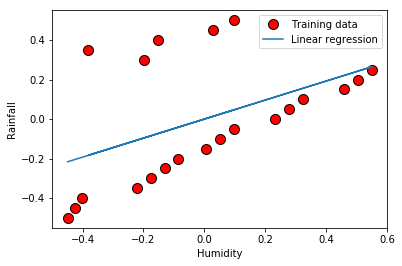

In [10]:
# plot the linear fit
plotData(_X[:, 1], _y)
pyplot.plot(_X[:, 1], np.dot(_X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

### Conclusions
- The regression line tend to follow the second cluster of points as there are many there and because we use batch linear regression is a norml thing